In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 10}) # Set global font size to 18

SAMPLING_PERIOD = 50 * 10**(-3)

# Function to pad a dataframe with zeros to a given length
def pad_with_zeros(df, target_len):
    idx = 0
    if len(df) < target_len:
        n_missing = target_len - len(df)
        zero_rows = pd.DataFrame(0, index=range(n_missing), columns=df.columns)
        zero_rows['index'] = range(len(df), len(df) + n_missing)
        
        df = pd.concat([df, zero_rows], ignore_index=True)
    return df

torque_ctrl = pd.read_csv('./Teste_24_10_2025/78_TORQUE_CTRL.csv')
wheel_spd = pd.read_csv('./Teste_24_10_2025/79_WHEEL_SPD.csv')
left_motor_info_1 = pd.read_csv('./Teste_24_10_2025/85_LEFT_MOTOR_INFO_1.csv')
left_motor_info_2 = pd.read_csv('./Teste_24_10_2025/86_LEFT_MOTOR_INFO_2.csv')
left_motor_info_3 = pd.read_csv('./Teste_24_10_2025/87_LEFT_MOTOR_INFO_3.csv')
left_motor_info_4 = pd.read_csv('./Teste_24_10_2025/88_LEFT_MOTOR_INFO_4.csv')

right_motor_info_1 = pd.read_csv('./Teste_24_10_2025/95_RIGHT_MOTOR_INFO_1.csv')
right_motor_info_2 = pd.read_csv('./Teste_24_10_2025/96_RIGHT_MOTOR_INFO_2.csv')
right_motor_info_3 = pd.read_csv('./Teste_24_10_2025/97_RIGHT_MOTOR_INFO_3.csv')
right_motor_info_4 = pd.read_csv('./Teste_24_10_2025/98_RIGHT_MOTOR_INFO_4.csv')

accelerometer = pd.read_csv('./Teste_24_10_2025/259_ACCELEROMETER.csv')

full_data = [
    torque_ctrl,
    wheel_spd,
    left_motor_info_1,
    left_motor_info_2,
    left_motor_info_3,
    left_motor_info_4,
    right_motor_info_1,
    right_motor_info_2,
    right_motor_info_3,
    right_motor_info_4,
    accelerometer
]

reference_length = torque_ctrl.shape[0]
referenced_data = []

for dataset in full_data:
    if dataset.shape[0] >= reference_length:
        referenced_data.append(dataset.iloc[0:reference_length])
    else:
        # pega os dados
        referenced_data.append(pad_with_zeros(dataset, reference_length))

reduced_data = [ 
    referenced_data[0].iloc[0:reference_length, 0:5],
    referenced_data[1].iloc[0:reference_length, 0:5],
    referenced_data[2].iloc[0:reference_length, 0:5],
    referenced_data[3].iloc[0:reference_length, 0:5],
    referenced_data[4].iloc[0:reference_length, 0:4],
    referenced_data[5].iloc[0:reference_length, 0:4],
    referenced_data[6].iloc[0:reference_length, 0:5],
    referenced_data[7].iloc[0:reference_length, 0:5],
    referenced_data[8].iloc[0:reference_length, 0:4],
    referenced_data[9].iloc[0:reference_length, 0:4],
    referenced_data[10].iloc[0:reference_length, 0:4]
]

# reduced_data[4].tail(100)
merged_df = pd.merge(reduced_data[0], reduced_data[1], on='index', how='inner')


for i in range(2, len(reduced_data)):
    merged_df = pd.merge(merged_df, reduced_data[i], on='index', how='inner')

merged_df['t'] = merged_df['index'] * SAMPLING_PERIOD
merged_df.columns



Index(['index', 'CONTROL_EVENT_FLAG_1', 'CONTROL_EVENT_FLAG_2',
       'REF_TORQUE_R_MOTOR', 'REF_TORQUE_L_MOTOR', 'SPEED_FL', 'SPEED_FR',
       'SPEED_RL', 'SPEED_RR', 'SPEED_L_MOTOR', 'TORQUE_L_MOTOR',
       'POWER_L_MOTOR', 'CURRENT_L_MOTOR', 'ENERGY_L_MOTOR',
       'OVERLOAD_L_MOTOR', 'TEMPERATURE1_L', 'TEMPERATURE2_L',
       'LOST_MSG_L_MOTOR', 'BUS_OFF_L_MOTOR', 'CAN_STATE_L_MOTOR',
       'SPEED_R_MOTOR_x', 'FAILURE_L_MOTOR', 'ALARM_L_MOTOR',
       'SPEED_R_MOTOR_y', 'TORQUE_R_MOTOR', 'POWER_R_MOTOR', 'CURRENT_R_MOTOR',
       'ENERGY_R_MOTOR', 'OVERLOAD_R_MOTOR', 'TEMPERATURE1_R',
       'TEMPERATURE2_R', 'LOST_MSG_R_MOTOR', 'BUS_OFF_R_MOTOR',
       'CAN_STATE_R_MOTOR', 'INV_STATE_R_MOTOR', 'FAILURE_R_MOTOR',
       'ALARM_R_MOTOR', 'ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 't'],
      dtype='object')

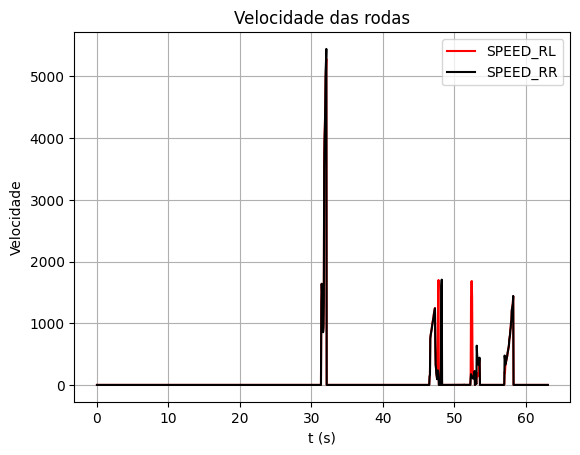

In [120]:
# plota a velocidade das rotas
plot_range = range(610, 650)
plot_range = range(merged_df.shape[0])

# plt.plot(merged_df['t'], merged_df['SPEED_FL'], label='SPEED_FL', color='blue')
# plt.plot(merged_df['t'], merged_df['SPEED_FR'], label='SPEED_FR', color='green')
plt.plot(merged_df['t'][plot_range], merged_df['SPEED_RL'][plot_range], label='SPEED_RL', color='red')
plt.plot(merged_df['t'][plot_range], merged_df['SPEED_RR'][plot_range], label='SPEED_RR', color='black')

plt.xlabel('t (s)')
plt.ylabel('Velocidade')
plt.title('Velocidade das rodas')
plt.legend()
plt.grid(True)
plt.show()

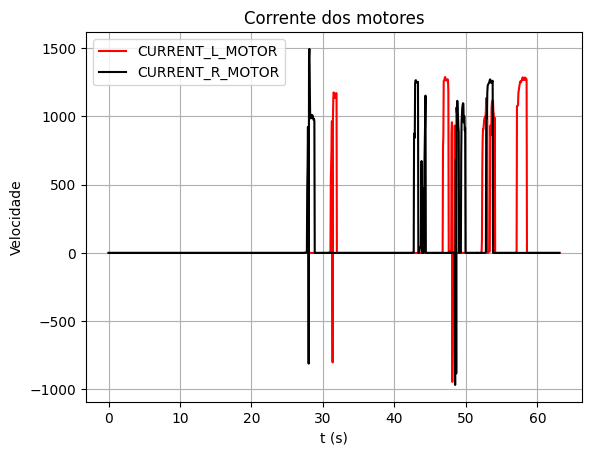

In [121]:
# plota a corrente dos motores

# plot_range = range(610, 650)
# plot_range = range(merged_df.shape[0])
plot_range = range(merged_df.shape[0])

plt.plot(merged_df['t'][plot_range], merged_df['CURRENT_L_MOTOR'][plot_range], label='CURRENT_L_MOTOR', color='red')
plt.plot(merged_df['t'][plot_range], merged_df['CURRENT_R_MOTOR'][plot_range], label='CURRENT_R_MOTOR', color='black')

plt.xlabel('t (s)')
plt.ylabel('Velocidade')
plt.title('Corrente dos motores')
plt.legend()
plt.grid(True)
plt.show()

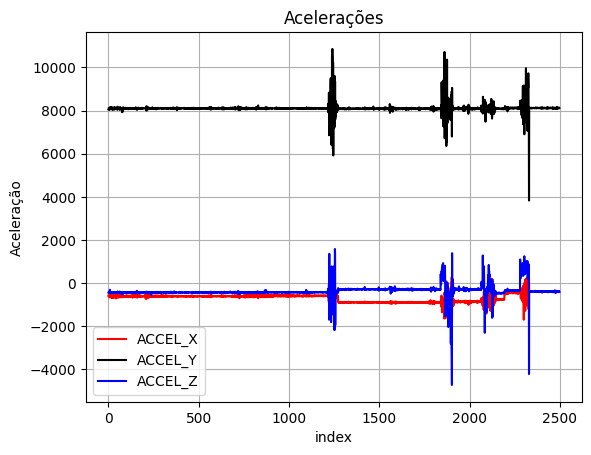

In [122]:
# plota a aceleracao da IMU

# plot_range = range(610, 650)
# plot_range = range(merged_df.shape[0])
plot_range = range(accelerometer.shape[0])

plt.plot(plot_range, accelerometer['ACCEL_X'][plot_range], label='ACCEL_X', color='red')
plt.plot(plot_range, accelerometer['ACCEL_Y'][plot_range], label='ACCEL_Y', color='black')
plt.plot(plot_range, accelerometer['ACCEL_Z'][plot_range], label='ACCEL_Z', color='blue')

plt.xlabel('index')
plt.ylabel('Aceleração')
plt.title('Acelerações')
plt.legend()
plt.grid(True)
plt.show()

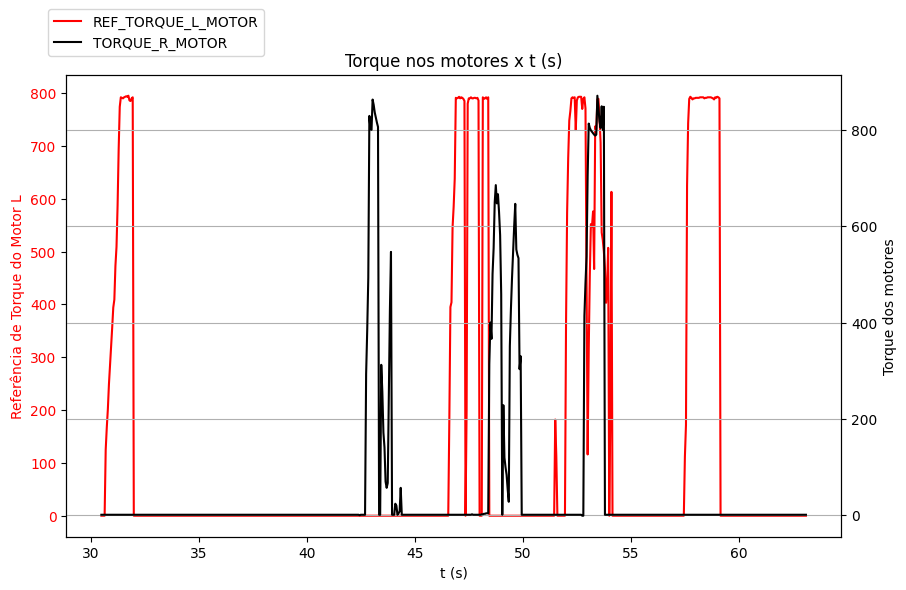

In [146]:
# plota a referência de torque dos motores
plot_range = range(610, merged_df.shape[0])
# plot_range = range(merged_df.shape[0])
# plot_range = range(merged_df.shape[0])

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(merged_df['t'][plot_range], merged_df['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='red')
# ax1.plot(merged_df['t'][plot_range], merged_df['REF_TORQUE_R_MOTOR'][plot_range], label='REF_TORQUE_R_MOTOR', color='orange')
ax1.set_xlabel('t (s)')
ax1.set_ylabel('Referência de Torque do Motor L', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(merged_df['t'][plot_range], merged_df['TORQUE_R_MOTOR'][plot_range], label='TORQUE_R_MOTOR', color='black')
# ax2.plot(merged_df['t'][plot_range], merged_df['CURRENT_R_MOTOR'][plot_range], label='CURRENT_R_MOTOR', color='purple')
# ax2.plot(merged_df['t'][plot_range], merged_df['POWER_R_MOTOR'][plot_range], label='POWER_R_MOTOR', color='purple')
ax2.set_ylabel('Torque dos motores', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a common title
plt.title('Torque nos motores x t (s)')

# Optional: align legends
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()